# Подготовка

Используем 2 лучших классификатора из прошлых экспериментов экспериментов

- RandomForestClassifier(n_estimators=150), precicion: 0.8608339728830903, recall: 0.801954242135367

- RF + XGBoost stacking, precicion=0.82435319, recall=0.82769304,

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from utils import get_best_threshold

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

from utils import (
    prepare_wallets_features_data,
    prepare_wallets_features_data_new,
    get_training_data,
    print_confusion_matrix,
    get_prepared_train_test,
)

In [4]:
# wallets_features = pd.read_csv("../dataset/custom/wallets_features_aggregated.csv")
wallets_features = pd.read_csv("../dataset/custom/features_fixed/wallets_features_with_users_agg.csv")

prep_data = prepare_wallets_features_data_new(wallets_features, type="raw")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)

In [5]:
wallets_features.shape

(822942, 56)

In [6]:
y_train.value_counts(), y_test.value_counts()

(class
 0    566103
 1      9956
 Name: count, dtype: int64,
 class
 0    242573
 1      4310
 Name: count, dtype: int64)

In [23]:
# prep_data = prepare_wallets_features_data(wallets_features, type="raw")
# X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)

train_data_raw = pd.read_csv("../dataset/custom/features_fixed/wallets_features__train.csv")
test_data_raw = pd.read_csv("../dataset/custom/features_fixed/wallets_features__test.csv")

In [24]:
test_data_raw[test_data_raw["addrId"].isin(train_data_raw["addrId"])].shape, test_data_raw.shape
test_data_raw_unique = test_data_raw[~test_data_raw["addrId"].isin(train_data_raw["addrId"])]

In [26]:
X_train_1, X_test_1, y_train_1, y_test_1 = get_prepared_train_test(
    train_data_raw,
    test_data_raw,
)

# X_train_1, X_test_1_unique, y_train_1, y_test_1_unique = get_prepared_train_test(
#     train_data_raw,
#     test_data_raw_unique,
# )

y_train_1.value_counts(), y_test_1.value_counts()

(class
 0    634653
 1     11576
 Name: count, dtype: int64,
 class
 0    182306
 1      2721
 Name: count, dtype: int64)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [15]:
y_train.value_counts()

class
0    565989
1     10070
Name: count, dtype: int64

In [16]:
y_resampled.value_counts()

class
0    565989
1    565989
Name: count, dtype: int64

# Эксперимент 1 - RandomOverSampler


        Best threshold: 0.5262631578947369
        Best F1: 0.8155411202353228, precicion: 0.8395155185465556, recall: 0.7928979980934223
        


{'thr': 0.5262631578947369,
 'precicion': 0.8395155185465556,
 'recall': 0.7928979980934223,
 'f1': 0.8155411202353228}

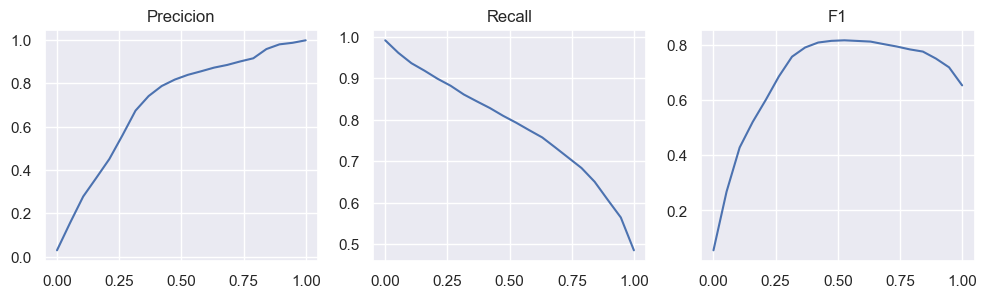

In [ ]:
from imblearn.over_sampling import RandomOverSampler
prep_data = prepare_wallets_features_data(wallets_features, type="full")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)
ros = RandomOverSampler(random_state=42,)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('rf', RandomForestClassifier(n_estimators=150))
])

model = pipeline.fit(X_resampled, y_resampled)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)

In [18]:
results, thrs, prec_hist, rec_hist = get_best_threshold(y_pred, y_test, plot=False, return_hists=True, thrs_cnt=50)
np.vstack((thrs, prec_hist, rec_hist)).T

array([[0.001     , 0.02878126, 0.99189704],
       [0.02136735, 0.07039352, 0.97712107],
       [0.04173469, 0.12066966, 0.96711153],
       [0.06210204, 0.17456868, 0.95734032],
       [0.08246939, 0.20856484, 0.94828408],
       [0.10283673, 0.27066016, 0.93898951],
       [0.12320408, 0.30265912, 0.93040991],
       [0.14357143, 0.33706986, 0.92445186],
       [0.16393878, 0.37362744, 0.9163489 ],
       [0.18430612, 0.41183458, 0.90896092],
       [0.20467347, 0.44085771, 0.90157293],
       [0.22504082, 0.47895408, 0.8948999 ],
       [0.24540816, 0.52073154, 0.88894185],
       [0.26577551, 0.5650978 , 0.88131554],
       [0.28614286, 0.61519072, 0.87249762],
       [0.3065102 , 0.65789951, 0.86439466],
       [0.32687755, 0.68475157, 0.857245  ],
       [0.3472449 , 0.71200638, 0.8508103 ],
       [0.36761224, 0.74064786, 0.84461392],
       [0.38797959, 0.75553644, 0.83746425],
       [0.40834694, 0.77557829, 0.83102955],
       [0.42871429, 0.79001368, 0.82578646],
       [0.


        Best threshold: 0.3686842105263158
        Best F1: 0.8044317191584713, precicion: 0.8420641125879593, recall: 0.7700190657769304
        


{'thr': 0.3686842105263158,
 'precicion': 0.8420641125879593,
 'recall': 0.7700190657769304,
 'f1': 0.8044317191584713}

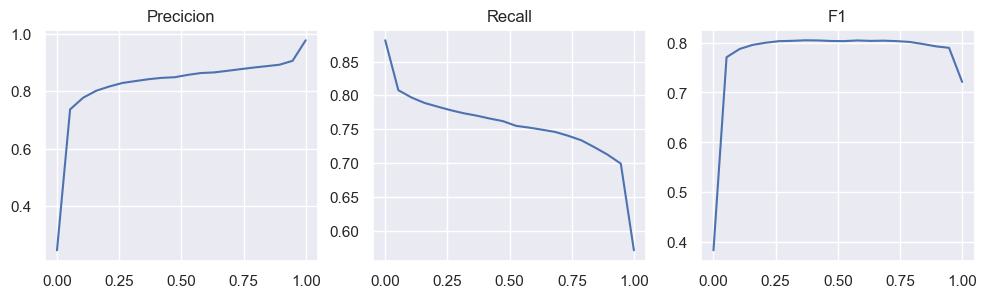

In [23]:
import xgboost as xgb 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

prep_data = prepare_wallets_features_data(wallets_features, type="full_with_extra_flags")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)
ros = RandomOverSampler(random_state=42,)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('xgb', xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, subsample=0.8))
    ],
    final_estimator=LogisticRegression()
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('clf', stacking_clf)
])

model = pipeline.fit(X_resampled, y_resampled)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)

In [24]:
results, thrs, prec_hist, rec_hist = get_best_threshold(y_pred, y_test, plot=False, return_hists=True, thrs_cnt=150)
np.vstack((thrs, prec_hist, rec_hist)).T

array([[0.001     , 0.24568164, 0.88131554],
       [0.00769799, 0.57372524, 0.84199237],
       [0.01439597, 0.64246222, 0.83079123],
       [0.02109396, 0.67230979, 0.82340324],
       [0.02779195, 0.6960665 , 0.81816015],
       [0.03448993, 0.71366097, 0.81673022],
       [0.04118792, 0.72318779, 0.81315539],
       [0.04788591, 0.73149742, 0.81029552],
       [0.05458389, 0.73758711, 0.80719733],
       [0.06128188, 0.7434428 , 0.80386082],
       [0.06797987, 0.74894374, 0.80266921],
       [0.07467785, 0.75324966, 0.80100095],
       [0.08137584, 0.75715896, 0.80028599],
       [0.08807383, 0.76430362, 0.79909438],
       [0.09477181, 0.76852489, 0.79837941],
       [0.1014698 , 0.77441   , 0.79766444],
       [0.10816779, 0.77943577, 0.79671115],
       [0.11486577, 0.78264947, 0.79551954],
       [0.12156376, 0.78729934, 0.79480458],
       [0.12826174, 0.79096314, 0.79265968],
       [0.13495973, 0.79293893, 0.79218303],
       [0.14165772, 0.79459589, 0.79194471],
       [0.

# Эксперимент 2 - ADASYN


        Best threshold: 0.7888947368421053
        Best F1: 0.7871712951585156, precicion: 0.8125317097919837, recall: 0.7633460438512869
        


{'thr': 0.7888947368421053,
 'precicion': 0.8125317097919837,
 'recall': 0.7633460438512869,
 'f1': 0.7871712951585156}

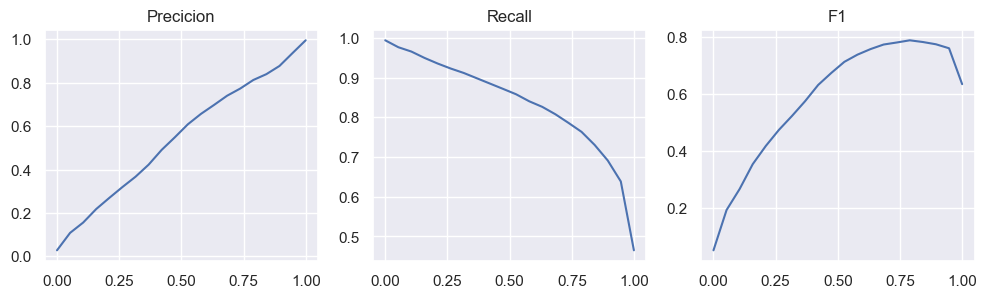

In [25]:
from imblearn.over_sampling import ADASYN
prep_data = prepare_wallets_features_data(wallets_features, type="full")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)
adasyn_sampler = ADASYN(random_state=42,)
X_resampled, y_resampled = adasyn_sampler.fit_resample(X_train, y_train)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('rf', RandomForestClassifier(n_estimators=150))
])

model = pipeline.fit(X_resampled, y_resampled)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)

In [31]:
print_confusion_matrix(y_pred, 0.5, y_test)


	real 1	real 0
pred 1	3629	2615	
pred 0	567	240072	


Ощутимого результата нет

# Cost matrix

In [8]:
y_train.value_counts()

class
0    566103
1      9956
Name: count, dtype: int64

In [6]:
X_train.shape, X_test.shape

((576059, 52), (246883, 52))

### Bad split - xgboost


        Best threshold: 0.053526315789473686
        Best F1: 0.6727100060433394, precicion: 0.5356799120032999, recall: 0.9039443155452436
        


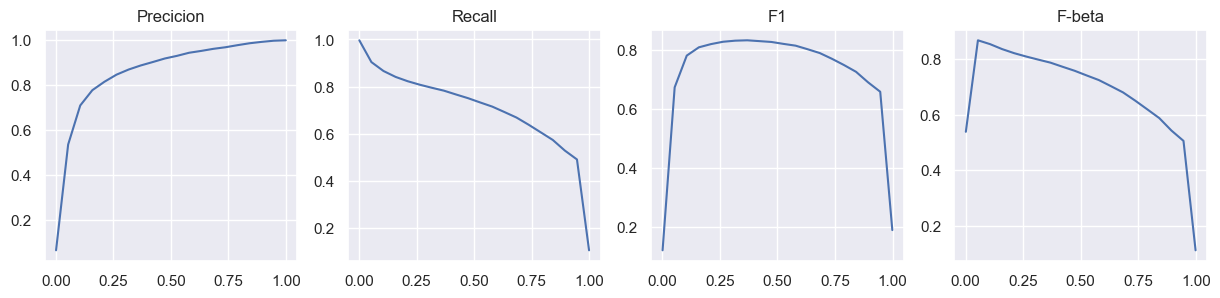

In [10]:
import xgboost as xgb
# prep_data = prepare_wallets_features_data(wallets_features, type="full")
# X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)

best_params = {'n_estimators': 297, 'max_depth': 3, 'learning_rate': 0.035945220741013736, 'subsample': 0.7341100732375431, 'colsample_bytree': 0.9953795550039859, 'min_child_weight': 4, 'gamma': 0.3909505373474582, 'reg_alpha': 7.311546429641343, 'reg_lambda': 0.9835545509646224, 'scale_pos_weight': 15.27610123192946}
best_params = {}

column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(X_train.columns))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('rf', xgb.XGBClassifier(**best_params))
])
# RandomForestClassifier(min_samples_leaf=
model = pipeline.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

res = get_best_threshold(y_pred, y_test, return_hists=True)

In [15]:
import optuna

from utils import get_best_metric_for_optuna

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 10.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 10.0),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1.0, 60.0)
    }

    model = xgb.XGBClassifier(**params, random_state=42, eval_metric="logloss")

    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_test)[:,1]
    metric, thr = get_best_metric_for_optuna(y_pred, y_test, interval=(0.1, 0.5))
    print_confusion_matrix(y_pred, thr, y_test)
    print(f"Precicion = {precision_score((y_pred >= thr).astype(int), y_test)}")
    print(f"Recall = {recall_score((y_pred >= thr).astype(int), y_test)}")

    return metric

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

[I 2025-04-03 18:47:47,125] A new study created in memory with name: no-name-a34d2f32-41b6-47d8-88b3-00c11f3448f2
[I 2025-04-03 18:47:51,268] Trial 0 finished with value: 0.8588183226377517 and parameters: {'n_estimators': 151, 'max_depth': 14, 'learning_rate': 0.07896068299218369, 'subsample': 0.7681123808995975, 'colsample_bytree': 0.8738042803949659, 'min_child_weight': 4, 'gamma': 1.0502818328591519, 'reg_alpha': 6.485867078901214, 'reg_lambda': 3.5216684708369494, 'scale_pos_weight': 23.63340505004117}. Best is trial 0 with value: 0.8588183226377517.


	real 1	real 0
pred 1	3881	1474	
pred 0	429	241099	
Precicion = 0.9004640371229699
Recall = 0.7247432306255835


[I 2025-04-03 18:47:57,074] Trial 1 finished with value: 0.8587443946188341 and parameters: {'n_estimators': 437, 'max_depth': 15, 'learning_rate': 0.2307698887568234, 'subsample': 0.7017620819966972, 'colsample_bytree': 0.8578919567444079, 'min_child_weight': 7, 'gamma': 2.751280685377637, 'reg_alpha': 5.244325753785864, 'reg_lambda': 0.5591023186033484, 'scale_pos_weight': 38.79724894486969}. Best is trial 0 with value: 0.8588183226377517.


	real 1	real 0
pred 1	3830	1230	
pred 0	480	241343	
Precicion = 0.888631090487239
Recall = 0.7569169960474308


[I 2025-04-03 18:48:02,346] Trial 2 finished with value: 0.78026223366893 and parameters: {'n_estimators': 324, 'max_depth': 8, 'learning_rate': 0.04571926765417736, 'subsample': 0.6253373208818778, 'colsample_bytree': 0.8227171395553459, 'min_child_weight': 6, 'gamma': 3.7246437916103026, 'reg_alpha': 1.2393374400556967, 'reg_lambda': 0.8124565420994978, 'scale_pos_weight': 42.126152847826575}. Best is trial 0 with value: 0.8588183226377517.


	real 1	real 0
pred 1	3999	4387	
pred 0	311	238186	
Precicion = 0.9278422273781902
Recall = 0.4768662055807298


[I 2025-04-03 18:48:06,882] Trial 3 finished with value: 0.7958814211360036 and parameters: {'n_estimators': 228, 'max_depth': 12, 'learning_rate': 0.013232871086853091, 'subsample': 0.9725220385418519, 'colsample_bytree': 0.7383840210790389, 'min_child_weight': 2, 'gamma': 0.2635178409344502, 'reg_alpha': 7.7009506528813345, 'reg_lambda': 5.421290002846061, 'scale_pos_weight': 1.5598617979866223}. Best is trial 0 with value: 0.8588183226377517.


	real 1	real 0
pred 1	3517	1338	
pred 0	793	241235	
Precicion = 0.8160092807424594
Recall = 0.7244078269824923


[I 2025-04-03 18:48:09,878] Trial 4 finished with value: 0.8521659308475762 and parameters: {'n_estimators': 239, 'max_depth': 8, 'learning_rate': 0.1769055621384969, 'subsample': 0.9526977124247689, 'colsample_bytree': 0.6905830211225915, 'min_child_weight': 3, 'gamma': 4.177568381357236, 'reg_alpha': 8.920406054676723, 'reg_lambda': 5.548045551591745, 'scale_pos_weight': 17.289301485683012}. Best is trial 0 with value: 0.8588183226377517.


	real 1	real 0
pred 1	3899	1738	
pred 0	411	240835	
Precicion = 0.9046403712296984
Recall = 0.6916799716161078


[I 2025-04-03 18:48:20,142] Trial 5 finished with value: 0.8615252939321592 and parameters: {'n_estimators': 483, 'max_depth': 11, 'learning_rate': 0.19685486242056727, 'subsample': 0.6548375311194475, 'colsample_bytree': 0.9323901220315587, 'min_child_weight': 6, 'gamma': 0.45794505677826725, 'reg_alpha': 5.6739450326284775, 'reg_lambda': 7.340108750309302, 'scale_pos_weight': 34.07114377558835}. Best is trial 5 with value: 0.8615252939321592.


	real 1	real 0
pred 1	3825	1134	
pred 0	485	241439	
Precicion = 0.8874709976798144
Recall = 0.7713248638838476


[I 2025-04-03 18:48:21,735] Trial 6 finished with value: 0.3738998543117728 and parameters: {'n_estimators': 103, 'max_depth': 4, 'learning_rate': 0.022910179806147245, 'subsample': 0.7086940899780286, 'colsample_bytree': 0.8664126473528446, 'min_child_weight': 6, 'gamma': 1.7388613955426857, 'reg_alpha': 5.2507689551793835, 'reg_lambda': 6.233493704882976, 'scale_pos_weight': 52.46327112853968}. Best is trial 5 with value: 0.8615252939321592.


	real 1	real 0
pred 1	3747	29120	
pred 0	563	213453	
Precicion = 0.8693735498839907
Recall = 0.11400492895609578


[I 2025-04-03 18:48:23,758] Trial 7 finished with value: 0.7896662465953901 and parameters: {'n_estimators': 85, 'max_depth': 10, 'learning_rate': 0.0947773329901533, 'subsample': 0.5470112286825173, 'colsample_bytree': 0.5299362915523358, 'min_child_weight': 4, 'gamma': 3.4568193180650586, 'reg_alpha': 4.425305094138973, 'reg_lambda': 3.9110771854997983, 'scale_pos_weight': 28.738359097318845}. Best is trial 5 with value: 0.8615252939321592.


	real 1	real 0
pred 1	3885	3474	
pred 0	425	239099	
Precicion = 0.9013921113689095
Recall = 0.5279249898083979


[I 2025-04-03 18:48:26,768] Trial 8 finished with value: 0.7047918852745715 and parameters: {'n_estimators': 263, 'max_depth': 4, 'learning_rate': 0.20578768621996654, 'subsample': 0.7295518926485398, 'colsample_bytree': 0.8567688839762175, 'min_child_weight': 10, 'gamma': 0.2709972720064141, 'reg_alpha': 7.8619960451099535, 'reg_lambda': 3.6005472047323863, 'scale_pos_weight': 42.28339827485919}. Best is trial 5 with value: 0.8615252939321592.


	real 1	real 0
pred 1	4030	7320	
pred 0	280	235253	
Precicion = 0.9350348027842227
Recall = 0.35506607929515416


[I 2025-04-03 18:48:32,293] Trial 9 finished with value: 0.8533679878709118 and parameters: {'n_estimators': 295, 'max_depth': 10, 'learning_rate': 0.06655807060323922, 'subsample': 0.8957487657085599, 'colsample_bytree': 0.9148714300904692, 'min_child_weight': 9, 'gamma': 3.7680285822525312, 'reg_alpha': 6.075350867566252, 'reg_lambda': 9.986271459418356, 'scale_pos_weight': 24.389459097338115}. Best is trial 5 with value: 0.8615252939321592.


	real 1	real 0
pred 1	3940	1905	
pred 0	370	240668	
Precicion = 0.91415313225058
Recall = 0.6740804106073567


[I 2025-04-03 18:48:39,546] Trial 10 finished with value: 0.8406137262572261 and parameters: {'n_estimators': 498, 'max_depth': 6, 'learning_rate': 0.2996653256307547, 'subsample': 0.5096421567174554, 'colsample_bytree': 0.9854003529353282, 'min_child_weight': 8, 'gamma': 1.8912558093683443, 'reg_alpha': 2.8026399805434083, 'reg_lambda': 9.072647752994031, 'scale_pos_weight': 58.98639728576708}. Best is trial 5 with value: 0.8615252939321592.


	real 1	real 0
pred 1	3868	1899	
pred 0	442	240674	
Precicion = 0.8974477958236659
Recall = 0.6707126755678863


[I 2025-04-03 18:48:43,747] Trial 11 finished with value: 0.8615691248414568 and parameters: {'n_estimators': 159, 'max_depth': 14, 'learning_rate': 0.11148610157447507, 'subsample': 0.8306052883399905, 'colsample_bytree': 0.9868643013352578, 'min_child_weight': 4, 'gamma': 1.023825127095816, 'reg_alpha': 6.676977467137151, 'reg_lambda': 7.452327303169395, 'scale_pos_weight': 12.023621751131715}. Best is trial 11 with value: 0.8615691248414568.


	real 1	real 0
pred 1	3804	1032	
pred 0	506	241541	
Precicion = 0.8825986078886311
Recall = 0.7866004962779156


[I 2025-04-03 18:48:50,786] Trial 12 finished with value: 0.8659230491329479 and parameters: {'n_estimators': 376, 'max_depth': 13, 'learning_rate': 0.12522125114984453, 'subsample': 0.8414535026744856, 'colsample_bytree': 0.9871758454297755, 'min_child_weight': 1, 'gamma': 1.0543731361817479, 'reg_alpha': 3.739995534698929, 'reg_lambda': 7.8266562998266656, 'scale_pos_weight': 9.582836527799397}. Best is trial 12 with value: 0.8659230491329479.


	real 1	real 0
pred 1	3835	1069	
pred 0	475	241504	
Precicion = 0.8897911832946636
Recall = 0.7820146818923328


[I 2025-04-03 18:48:57,518] Trial 13 finished with value: 0.8650699872750409 and parameters: {'n_estimators': 370, 'max_depth': 13, 'learning_rate': 0.11283321008239836, 'subsample': 0.8334994579356324, 'colsample_bytree': 0.9867040707342877, 'min_child_weight': 1, 'gamma': 1.219704607593905, 'reg_alpha': 3.4039321601394072, 'reg_lambda': 7.786589358742634, 'scale_pos_weight': 6.006966102744712}. Best is trial 12 with value: 0.8659230491329479.


	real 1	real 0
pred 1	3807	957	
pred 0	503	241616	
Precicion = 0.8832946635730858
Recall = 0.7991183879093199


[I 2025-04-03 18:49:02,852] Trial 14 finished with value: 0.8623304782298359 and parameters: {'n_estimators': 372, 'max_depth': 13, 'learning_rate': 0.1349451014517316, 'subsample': 0.8374232964625291, 'colsample_bytree': 0.6135710653196844, 'min_child_weight': 1, 'gamma': 1.757259445507619, 'reg_alpha': 3.0300996535290996, 'reg_lambda': 8.234782808414298, 'scale_pos_weight': 4.581590460227304}. Best is trial 12 with value: 0.8659230491329479.


	real 1	real 0
pred 1	3866	1310	
pred 0	444	241263	
Precicion = 0.896983758700696
Recall = 0.7469088098918083


[I 2025-04-03 18:49:10,664] Trial 15 finished with value: 0.8681195237025388 and parameters: {'n_estimators': 397, 'max_depth': 12, 'learning_rate': 0.051032026861919676, 'subsample': 0.8249765447672543, 'colsample_bytree': 0.7914814076173234, 'min_child_weight': 1, 'gamma': 2.5702875065665003, 'reg_alpha': 0.5541165352867408, 'reg_lambda': 7.263550668787956, 'scale_pos_weight': 10.471535493946249}. Best is trial 15 with value: 0.8681195237025388.


	real 1	real 0
pred 1	3864	1151	
pred 0	446	241422	
Precicion = 0.8965197215777262
Recall = 0.7704885343968095


[I 2025-04-03 18:49:18,743] Trial 16 finished with value: 0.8653545068217401 and parameters: {'n_estimators': 413, 'max_depth': 12, 'learning_rate': 0.04247207006552767, 'subsample': 0.8946250177218287, 'colsample_bytree': 0.7729185872733737, 'min_child_weight': 2, 'gamma': 2.915171664971436, 'reg_alpha': 0.003121208850969448, 'reg_lambda': 6.912571635183148, 'scale_pos_weight': 14.046532137114998}. Best is trial 15 with value: 0.8681195237025388.


	real 1	real 0
pred 1	3869	1246	
pred 0	441	241327	
Precicion = 0.8976798143851508
Recall = 0.7564027370478983


[I 2025-04-03 18:49:26,918] Trial 17 finished with value: 0.8604547481052163 and parameters: {'n_estimators': 343, 'max_depth': 15, 'learning_rate': 0.03157934330974881, 'subsample': 0.7813097193120967, 'colsample_bytree': 0.6426989140408151, 'min_child_weight': 2, 'gamma': 2.39440098910218, 'reg_alpha': 1.2357968307290426, 'reg_lambda': 8.72062363882286, 'scale_pos_weight': 10.87959608352952}. Best is trial 15 with value: 0.8681195237025388.


	real 1	real 0
pred 1	3860	1330	
pred 0	450	241243	
Precicion = 0.8955916473317865
Recall = 0.74373795761079


[I 2025-04-03 18:49:34,524] Trial 18 finished with value: 0.8087923279300687 and parameters: {'n_estimators': 425, 'max_depth': 9, 'learning_rate': 0.020313075933759736, 'subsample': 0.9062261544320163, 'colsample_bytree': 0.7831553146290972, 'min_child_weight': 1, 'gamma': 2.2232674529613066, 'reg_alpha': 1.7591071242503342, 'reg_lambda': 9.979527234368458, 'scale_pos_weight': 19.34539455675675}. Best is trial 15 with value: 0.8681195237025388.


	real 1	real 0
pred 1	3812	2514	
pred 0	498	240059	
Precicion = 0.8844547563805104
Recall = 0.602592475497945


[I 2025-04-03 18:49:40,518] Trial 19 finished with value: 0.857723936687594 and parameters: {'n_estimators': 382, 'max_depth': 11, 'learning_rate': 0.05435243724243378, 'subsample': 0.8235448230643942, 'colsample_bytree': 0.5123347798387794, 'min_child_weight': 3, 'gamma': 4.6236811998090515, 'reg_alpha': 0.1597144306068019, 'reg_lambda': 4.5616199423105845, 'scale_pos_weight': 8.752215032300459}. Best is trial 15 with value: 0.8681195237025388.


	real 1	real 0
pred 1	3880	1498	
pred 0	430	241075	
Precicion = 0.9002320185614849
Recall = 0.7214577910003719


[I 2025-04-03 18:49:44,616] Trial 20 finished with value: 0.7635180240320427 and parameters: {'n_estimators': 304, 'max_depth': 6, 'learning_rate': 0.03388135385853334, 'subsample': 0.9914332286887839, 'colsample_bytree': 0.7104781240448822, 'min_child_weight': 3, 'gamma': 3.0460442188929817, 'reg_alpha': 4.220271006276677, 'reg_lambda': 6.426149882634797, 'scale_pos_weight': 20.122213398715417}. Best is trial 15 with value: 0.8681195237025388.


	real 1	real 0
pred 1	3660	3068	
pred 0	650	239505	
Precicion = 0.8491879350348028
Recall = 0.5439952437574316


[I 2025-04-03 18:49:52,922] Trial 21 finished with value: 0.8666844539309854 and parameters: {'n_estimators': 438, 'max_depth': 12, 'learning_rate': 0.04136833806736332, 'subsample': 0.8947212603961159, 'colsample_bytree': 0.785044711680624, 'min_child_weight': 2, 'gamma': 2.933518469353154, 'reg_alpha': 0.049406875206325696, 'reg_lambda': 6.968103441179436, 'scale_pos_weight': 12.705018814036496}. Best is trial 15 with value: 0.8681195237025388.


	real 1	real 0
pred 1	3898	1350	
pred 0	412	241223	
Precicion = 0.9044083526682135
Recall = 0.7427591463414634


[I 2025-04-03 18:50:00,569] Trial 22 finished with value: 0.8680086463118076 and parameters: {'n_estimators': 459, 'max_depth': 12, 'learning_rate': 0.06324079341424463, 'subsample': 0.8899506876975708, 'colsample_bytree': 0.806800255617545, 'min_child_weight': 1, 'gamma': 2.202320909481628, 'reg_alpha': 1.6456504998913113, 'reg_lambda': 6.316449044143344, 'scale_pos_weight': 13.87971114024392}. Best is trial 15 with value: 0.8681195237025388.


	real 1	real 0
pred 1	3855	1111	
pred 0	455	241462	
Precicion = 0.894431554524362
Recall = 0.7762786951268627


[I 2025-04-03 18:50:06,871] Trial 23 finished with value: 0.8678623881792692 and parameters: {'n_estimators': 458, 'max_depth': 11, 'learning_rate': 0.06928231613917991, 'subsample': 0.9282155715308965, 'colsample_bytree': 0.805898508086332, 'min_child_weight': 2, 'gamma': 3.1881887765645534, 'reg_alpha': 1.6807757225937663, 'reg_lambda': 6.063066165124638, 'scale_pos_weight': 15.491344782875215}. Best is trial 15 with value: 0.8681195237025388.


	real 1	real 0
pred 1	3900	1329	
pred 0	410	241244	
Precicion = 0.9048723897911833
Recall = 0.7458405048766494


[I 2025-04-03 18:50:13,800] Trial 24 finished with value: 0.8631254132686798 and parameters: {'n_estimators': 472, 'max_depth': 10, 'learning_rate': 0.0627031171802292, 'subsample': 0.9451065778501315, 'colsample_bytree': 0.8148485744660415, 'min_child_weight': 5, 'gamma': 3.3320713177382415, 'reg_alpha': 2.30041866098736, 'reg_lambda': 2.5708464898177246, 'scale_pos_weight': 26.897535848284363}. Best is trial 15 with value: 0.8681195237025388.


	real 1	real 0
pred 1	3916	1529	
pred 0	394	241044	
Precicion = 0.908584686774942
Recall = 0.7191919191919192


[I 2025-04-03 18:50:17,872] Trial 25 finished with value: 0.832953820930868 and parameters: {'n_estimators': 460, 'max_depth': 11, 'learning_rate': 0.08167531214481538, 'subsample': 0.9319745424321412, 'colsample_bytree': 0.7274866318806505, 'min_child_weight': 1, 'gamma': 2.248041376603688, 'reg_alpha': 1.014166015352007, 'reg_lambda': 5.681372195002738, 'scale_pos_weight': 1.0497850425619806}. Best is trial 15 with value: 0.8681195237025388.


	real 1	real 0
pred 1	3658	1060	
pred 0	652	241513	
Precicion = 0.8487238979118329
Recall = 0.7753285290377279


[I 2025-04-03 18:50:24,889] Trial 26 finished with value: 0.8346038245415341 and parameters: {'n_estimators': 406, 'max_depth': 9, 'learning_rate': 0.03089128611529572, 'subsample': 0.8667885465495064, 'colsample_bytree': 0.6675075119425108, 'min_child_weight': 3, 'gamma': 2.6295479722437456, 'reg_alpha': 2.1043731281619737, 'reg_lambda': 4.568477128061064, 'scale_pos_weight': 17.31622871037554}. Best is trial 15 with value: 0.8681195237025388.


	real 1	real 0
pred 1	3832	1885	
pred 0	478	240688	
Precicion = 0.8890951276102088
Recall = 0.6702816162322897


[I 2025-04-03 18:50:33,640] Trial 27 finished with value: 0.8664550453793535 and parameters: {'n_estimators': 458, 'max_depth': 14, 'learning_rate': 0.05396570676271796, 'subsample': 0.7964240868243503, 'colsample_bytree': 0.8145185786432516, 'min_child_weight': 2, 'gamma': 3.2556863185645075, 'reg_alpha': 1.153620604748407, 'reg_lambda': 6.5385103088520795, 'scale_pos_weight': 32.86144923488619}. Best is trial 15 with value: 0.8681195237025388.


	real 1	real 0
pred 1	3876	1251	
pred 0	434	241322	
Precicion = 0.8993039443155453
Recall = 0.7559976594499708


[I 2025-04-03 18:50:39,169] Trial 28 finished with value: 0.7809705992431488 and parameters: {'n_estimators': 339, 'max_depth': 8, 'learning_rate': 0.022616991894899987, 'subsample': 0.9983135482055489, 'colsample_bytree': 0.9078927395769223, 'min_child_weight': 5, 'gamma': 4.08934442516759, 'reg_alpha': 2.595649996028051, 'reg_lambda': 1.6574751400691756, 'scale_pos_weight': 21.5177581628903}. Best is trial 15 with value: 0.8681195237025388.


	real 1	real 0
pred 1	3756	3051	
pred 0	554	239522	
Precicion = 0.871461716937355
Recall = 0.5517849272807405


[I 2025-04-03 18:50:48,640] Trial 29 finished with value: 0.8684175204688829 and parameters: {'n_estimators': 499, 'max_depth': 12, 'learning_rate': 0.08642767477924684, 'subsample': 0.7546159507404115, 'colsample_bytree': 0.5891330043708496, 'min_child_weight': 4, 'gamma': 1.4141610641516467, 'reg_alpha': 0.7225466198364565, 'reg_lambda': 4.851839884308098, 'scale_pos_weight': 15.498963517602764}. Best is trial 29 with value: 0.8684175204688829.


	real 1	real 0
pred 1	3882	1229	
pred 0	428	241344	
Precicion = 0.9006960556844548
Recall = 0.7595382508315398


In [2]:
3682 / (3682 + 428)

0.8958637469586375

In [ ]:
res = get_best_threshold(y_pred, y_test, thrs_cnt=50, return_hists=True, plot=False)
np.vstack((res[1], res[-2], res[-1])).T

### Bad split - RF


        Best threshold: 0.3686842105263158
        Best F1: 0.8587338094661663, precicion: 0.8977474057200708, recall: 0.8229698375870069
        


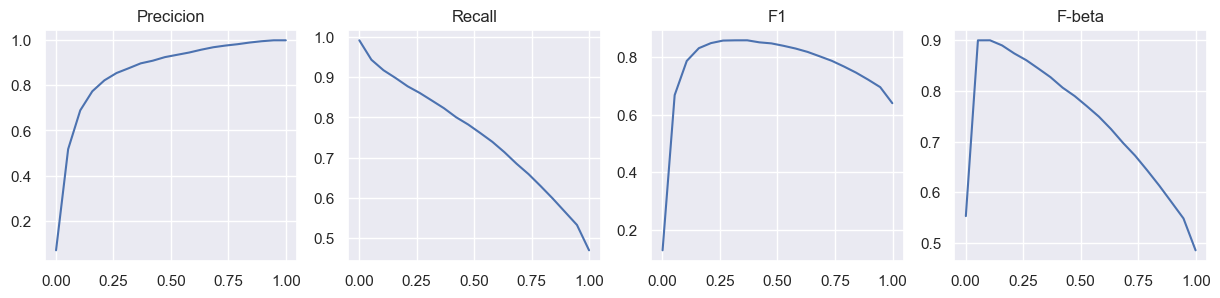

In [ ]:
# prep_data = prepare_wallets_features_data(wallets_features, type="full")
# X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)

best_params = {'n_estimators': 297, 'max_depth': 3, 'learning_rate': 0.035945220741013736, 'subsample': 0.7341100732375431, 'colsample_bytree': 0.9953795550039859, 'min_child_weight': 4, 'gamma': 0.3909505373474582, 'reg_alpha': 7.311546429641343, 'reg_lambda': 0.9835545509646224, 'scale_pos_weight': 15.27610123192946}


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(X_train.columns))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('rf', RandomForestClassifier(n_estimators=150, class_weight={0: 1, 1: 30}))
])
# RandomForestClassifier(min_samples_leaf=
model = pipeline.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

res = get_best_threshold(y_pred, y_test, return_hists=True)

In [25]:
res = get_best_threshold(y_pred, y_test, thrs_cnt=50, return_hists=True, plot=False)
np.vstack((res[1], res[-2], res[-1])).T

array([[0.001     , 0.06850062, 0.99141531],
       [0.02136735, 0.26663678, 0.96589327],
       [0.04173469, 0.43359086, 0.95058005],
       [0.06210204, 0.55595222, 0.93944316],
       [0.08246939, 0.63310607, 0.92645012],
       [0.10283673, 0.68555094, 0.91809745],
       [0.12320408, 0.72490294, 0.90974478],
       [0.14357143, 0.75656232, 0.90278422],
       [0.16393878, 0.78193966, 0.89605568],
       [0.18430612, 0.8012968 , 0.88886311],
       [0.20467347, 0.81798577, 0.8800464 ],
       [0.22504082, 0.83266844, 0.87169374],
       [0.24540816, 0.84469097, 0.86566125],
       [0.26577551, 0.85503572, 0.86078886],
       [0.28614286, 0.86362568, 0.85220418],
       [0.3065102 , 0.87164751, 0.84454756],
       [0.32687755, 0.88278388, 0.8387471 ],
       [0.3472449 , 0.89165629, 0.83062645],
       [0.36761224, 0.89683944, 0.82296984],
       [0.38797959, 0.90143737, 0.81484919],
       [0.40834694, 0.90667362, 0.80696056],
       [0.42871429, 0.9123411 , 0.79930394],
       [0.

In [23]:
X_train.columns

Index(['btc_received_total', 'btc_received_min', 'btc_received_max',
       'btc_received_mean', 'incoming_tx_cnt',
       'incoming_tx_input_address_cnt_mean',
       'incoming_tx_output_address_cnt_mean', 'btc_received_gini',
       'input_address_cnt', 'incoming_tx_fees_mean', 'incoming_tx_fees_min',
       'incoming_tx_fees_max', 'incoming_tx_whole_fee_4_cnt', 'btc_sent_total',
       'btc_sent_min', 'btc_sent_max', 'btc_sent_mean', 'outcoming_tx_cnt',
       'outcoming_tx_output_address_cnt_mean',
       'outcoming_tx_input_address_cnt_mean', 'btc_sent_gini',
       'output_address_cnt', 'outcoming_tx_fees_mean', 'outcoming_tx_fees_min',
       'outcoming_tx_fees_max', 'outcoming_tx_whole_fee_4_cnt',
       'outcoming_tx_fees_total', 'outcoming_tx_ts_cnt',
       'outcoming_tx_ts_gini', 'incoming_tx_ts_cnt', 'incoming_tx_ts_gini',
       'first_block_appeared_in', 'last_block_appeared_in',
       'lifetime_in_blocks', 'user_addr_cnt', 'user_outcoming_tx_cnt',
       'user_incoming

In [27]:
rf_model = pipeline.named_steps['rf']
for ind in np.argsort(rf_model.feature_importances_)[::-1]:
    print((X_train.columns)[ind], rf_model.feature_importances_[ind])

btc_sent_total 0.059242261959873255
user_addr_cnt 0.056065621040674384
incoming_tx_ts_cnt 0.052042665222316015
btc_received_min 0.045571612263669084
btc_sent_min 0.04422635405905365
last_block_appeared_in 0.043100392149818326
user_whole_fee_5 0.04159051941487359
user_outcoming_tx_cnt 0.038600855085382614
output_address_cnt 0.03831546944008901
incoming_tx_ts_gini 0.0351494878952048
user_btc_sent_median 0.029908543489398323
incoming_tx_fees_max 0.0288455903630115
outcoming_tx_cnt 0.02824856110482409
user_btc_transacted_total 0.027356624807611994
incoming_tx_fees_mean 0.02661688331388933
btc_sent_max 0.025460300103577953
incoming_tx_input_address_cnt_mean 0.023865338149391374
outcoming_tx_ts_cnt 0.023661568650139863
user_user_ts_fees_share_min 0.02359895593832743
first_block_appeared_in 0.022529186703339567
outcoming_tx_ts_gini 0.02179281863788633
user_user_ts_fees_share_max 0.01927549000082061
user_btc_received_median 0.01842787731682083
input_address_cnt 0.017428907920491787
btc_receive

## Ensemble (RF + XGB)


        Best threshold: 0.15857894736842104
        Best F1: 0.8615751789976135, precicion: 0.8869778869778869, recall: 0.8375870069605569
        


{'thr': 0.15857894736842104,
 'precicion': 0.8869778869778869,
 'recall': 0.8375870069605569,
 'f1': 0.8615751789976135}

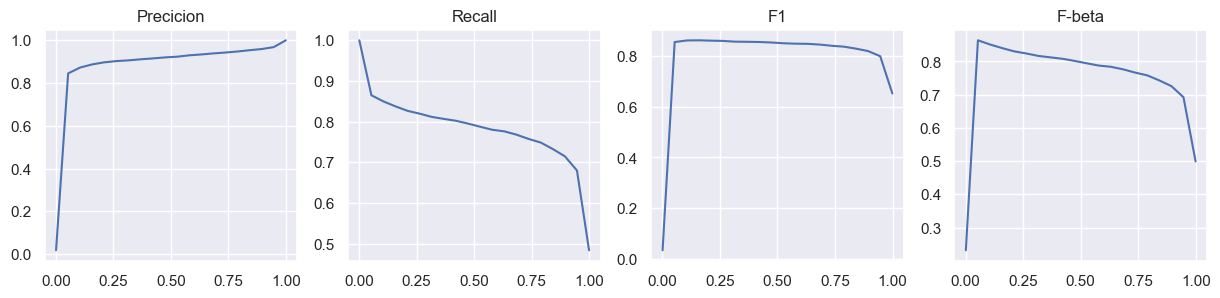

In [ ]:
import xgboost as xgb 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

# prep_data = prepare_wallets_features_data(wallets_features, type="full_with_extra_flags")
# X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('xgb', xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, subsample=0.8))
    ],
    final_estimator=LogisticRegression()
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('clf', stacking_clf)
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)

In [29]:
res = get_best_threshold(y_pred, y_test, thrs_cnt=50, return_hists=True, plot=False)
np.vstack((res[1], res[-2], res[-1])).T

array([[0.001     , 0.01745766, 1.        ],
       [0.02136735, 0.78188125, 0.88909513],
       [0.04173469, 0.83075221, 0.8712297 ],
       [0.06210204, 0.85089327, 0.86194896],
       [0.08246939, 0.86262579, 0.85522042],
       [0.10283673, 0.8719715 , 0.85174014],
       [0.12320408, 0.87837187, 0.84617169],
       [0.14357143, 0.88427734, 0.84037123],
       [0.16393878, 0.88771239, 0.83642691],
       [0.18430612, 0.89193227, 0.83109049],
       [0.20467347, 0.89585947, 0.82830626],
       [0.22504082, 0.89790245, 0.82436195],
       [0.24540816, 0.90129738, 0.82204176],
       [0.26577551, 0.90242656, 0.81972158],
       [0.28614286, 0.90372272, 0.81670534],
       [0.3065102 , 0.90526588, 0.8136891 ],
       [0.32687755, 0.90689834, 0.81136891],
       [0.3472449 , 0.90852228, 0.80881671],
       [0.36761224, 0.91027988, 0.80742459],
       [0.38797959, 0.91313504, 0.80487239],
       [0.40834694, 0.91470821, 0.8037123 ],
       [0.42871429, 0.91498941, 0.80162413],
       [0.

In [53]:
from collections import defaultdict

rf_model = pipeline.named_steps['clf']
feature_to_imps_list = defaultdict(lambda : [])
rf_model.estimators_[0].feature_importances_
for submodel in pipeline.named_steps['clf'].estimators_:
    for ind in np.argsort(submodel.feature_importances_)[::-1]:
        feature_to_imps_list[ X_train.columns[ind] ].append(submodel.feature_importances_[ind])
        # print((X_train.columns)[ind], submodel.feature_importances_[ind])
feature_imps_list = []
for k in feature_to_imps_list.keys():
    feature_imps_list.append((
        k,
        np.mean(feature_to_imps_list[k])
    ))
feature_imps_list.sort(key=lambda x : x[1], reverse=True)

feature_imps_list
# for ind in np.argsort(rf_model.feature_importances_)[::-1]:
#     print((X_train.columns)[ind], rf_model.feature_importances_[ind])

[('user_outcoming_tx_cnt', 0.11130955028031533),
 ('btc_sent_total', 0.05754340572881059),
 ('incoming_tx_fees_min', 0.050100039655149094),
 ('incoming_tx_ts_cnt', 0.04161536448826865),
 ('outcoming_tx_cnt', 0.035048725659737476),
 ('incoming_tx_fees_max', 0.03473002820495089),
 ('btc_sent_max', 0.03393465671281762),
 ('user_whole_fee_5', 0.03092312123854444),
 ('output_address_cnt', 0.030206489739152388),
 ('btc_received_total', 0.027354015069021853),
 ('user_overall_activity_coef', 0.026893872200473463),
 ('user_btc_sent_median', 0.02588409182780415),
 ('user_btc_transacted_total', 0.025006823710830052),
 ('incoming_tx_ts_gini', 0.02459342665538105),
 ('outcoming_tx_input_address_cnt_mean', 0.024193929072440078),
 ('outcoming_tx_ts_gini', 0.022034084716407935),
 ('input_address_cnt', 0.021620890095254745),
 ('btc_sent_min', 0.021018767266531867),
 ('incoming_tx_fees_mean', 0.020832131508788786),
 ('outcoming_tx_fees_max', 0.01979862348104316),
 ('incoming_tx_input_address_cnt_mean', 

In [28]:
y_pred_vals.shape, (y_pred_vals == 1).sum()

((138058,), 537)


        Best threshold: 0.8939473684210526
        Best F1: 0.7525982256020279, precicion: 0.8037357877639415, recall: 0.7075786463298379
        


{'thr': 0.8939473684210526,
 'precicion': 0.8037357877639415,
 'recall': 0.7075786463298379,
 'f1': 0.7525982256020279}

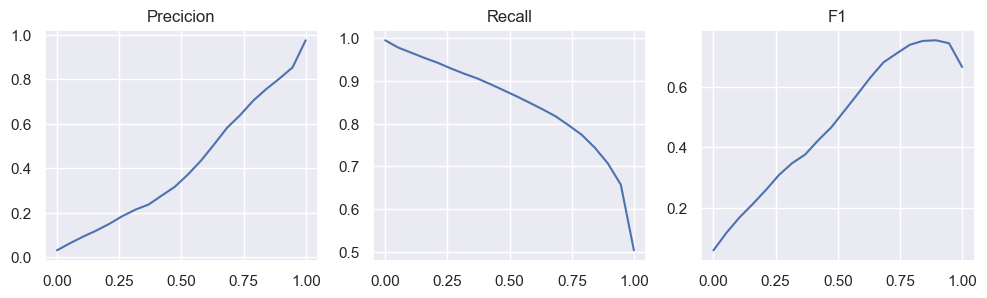

In [35]:
prep_data = prepare_wallets_features_data(wallets_features, type="full")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('rf', RandomForestClassifier(n_estimators=150, class_weight={0: 1, 1: 20}))
])

model = pipeline.fit(X_resampled, y_resampled)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)


        Best threshold: 0.8939473684210526
        Best F1: 0.7525982256020279, precicion: 0.8037357877639415, recall: 0.7075786463298379
        


{'thr': 0.8939473684210526,
 'precicion': 0.8037357877639415,
 'recall': 0.7075786463298379,
 'f1': 0.7525982256020279}

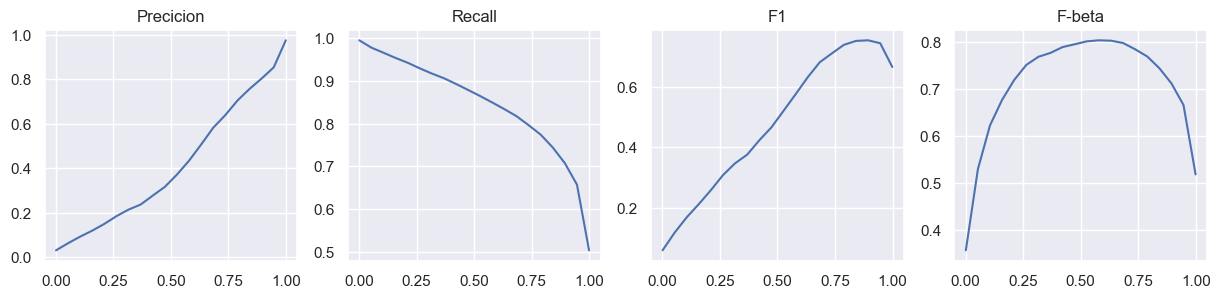

In [39]:
get_best_threshold(y_pred, y_test)


        Best threshold: 0.3686842105263158
        Best F1: 0.8200316802729378, precicion: 0.8389429070057343, recall: 0.801954242135367
        


{'thr': 0.3686842105263158,
 'precicion': 0.8389429070057343,
 'recall': 0.801954242135367,
 'f1': 0.8200316802729378}

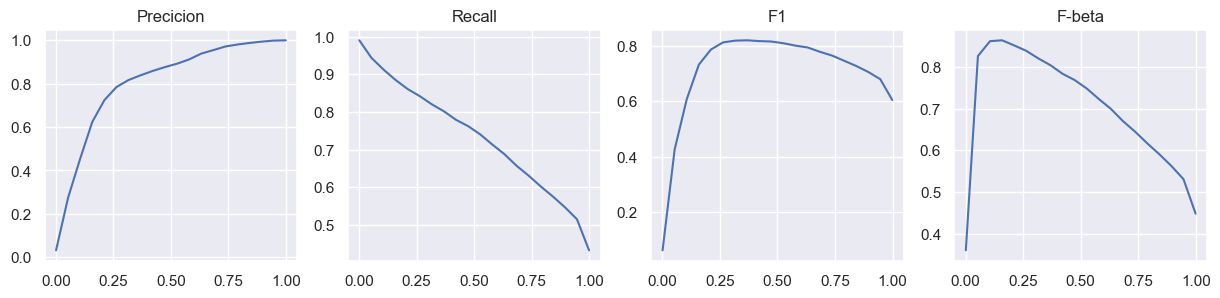

In [96]:
prep_data = prepare_wallets_features_data(wallets_features, type="full_with_extra_flags")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('rf', RandomForestClassifier(n_estimators=150, class_weight={0: 1, 1: 15}))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)

In [ ]:
prep_data = prepare_wallets_features_data(wallets_features, type="full_with_extra_flags")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('rf', RandomForestClassifier(n_estimators=150, class_weight={0: 1, 1: 5}))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)


        Best threshold: 0.5787894736842105
        Best F1: 0.7963824289405685, precicion: 0.8696388261851016, recall: 0.734509056244042
        


{'thr': 0.5787894736842105,
 'precicion': 0.8696388261851016,
 'recall': 0.734509056244042,
 'f1': 0.7963824289405685}

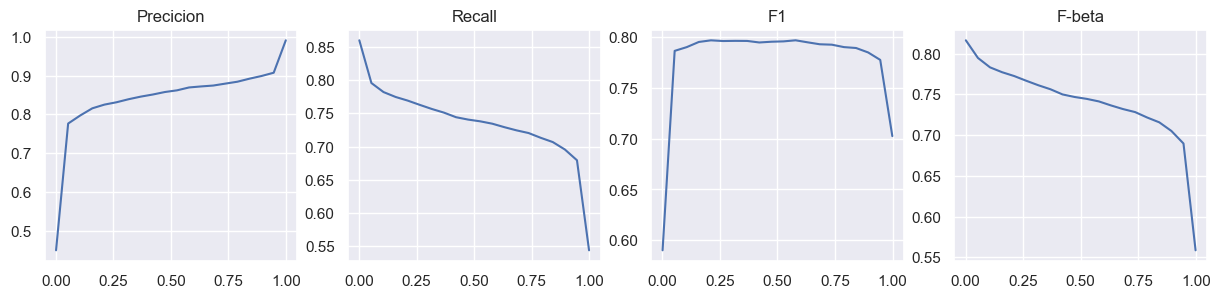

In [92]:
import xgboost as xgb 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

prep_data = prepare_wallets_features_data(wallets_features, type="full_with_extra_flags")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)
ros = RandomOverSampler(random_state=42,)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, class_weight={0: 1, 1: 3})),
        ('xgb', xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, subsample=0.8, scale_pos_weight=3))
    ],
    final_estimator=LogisticRegression()
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('clf', stacking_clf)
])

model = pipeline.fit(X_resampled, y_resampled)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)


        Best threshold: 0.3161578947368421
        Best F1: 0.7945696721311477, precicion: 0.8588039867109635, recall: 0.7392755004766445
        


{'thr': 0.3161578947368421,
 'precicion': 0.8588039867109635,
 'recall': 0.7392755004766445,
 'f1': 0.7945696721311477}

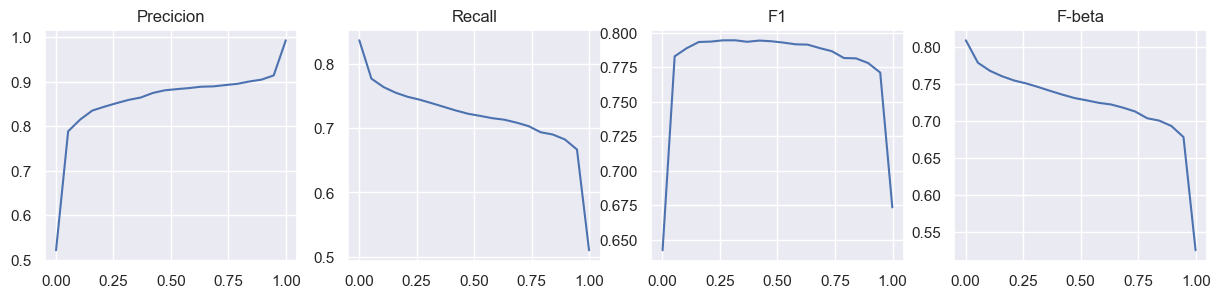

In [93]:
import xgboost as xgb 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

prep_data = prepare_wallets_features_data(wallets_features, type="full")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)
ros = RandomOverSampler(random_state=42,)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, class_weight={0: 1, 1: 3})),
        ('xgb', xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, subsample=0.8, scale_pos_weight=3))
    ],
    final_estimator=LogisticRegression()
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('clf', stacking_clf)
])

model = pipeline.fit(X_resampled, y_resampled)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)

In [ ]:
print_confusion_matrix(y_pred, )

# on  new split

In [61]:
train_data_raw.columns

Index(['addrId', 'btc_received_total', 'btc_received_min', 'btc_received_max',
       'btc_received_mean', 'incoming_tx_cnt',
       'incoming_tx_input_address_cnt_mean',
       'incoming_tx_output_address_cnt_mean', 'btc_received_gini',
       'input_address_cnt', 'incoming_tx_fees_mean', 'incoming_tx_fees_min',
       'incoming_tx_fees_max', 'incoming_tx_whole_fee_4_cnt', 'btc_sent_total',
       'btc_sent_min', 'btc_sent_max', 'btc_sent_mean', 'outcoming_tx_cnt',
       'outcoming_tx_output_address_cnt_mean',
       'outcoming_tx_input_address_cnt_mean', 'btc_sent_gini',
       'output_address_cnt', 'outcoming_tx_fees_mean', 'outcoming_tx_fees_min',
       'outcoming_tx_fees_max', 'outcoming_tx_whole_fee_4_cnt',
       'outcoming_tx_fees_total', 'outcoming_tx_ts_cnt',
       'outcoming_tx_ts_gini', 'incoming_tx_ts_cnt', 'incoming_tx_ts_gini',
       'Time step', 'class', 'first_block_appeared_in',
       'last_block_appeared_in', 'lifetime_in_blocks'],
      dtype='object')


        Best threshold: 0.6313157894736842
        Best F1: 0.18227159374291543, precicion: 0.2378698224852071, recall: 0.14773980154355015
        


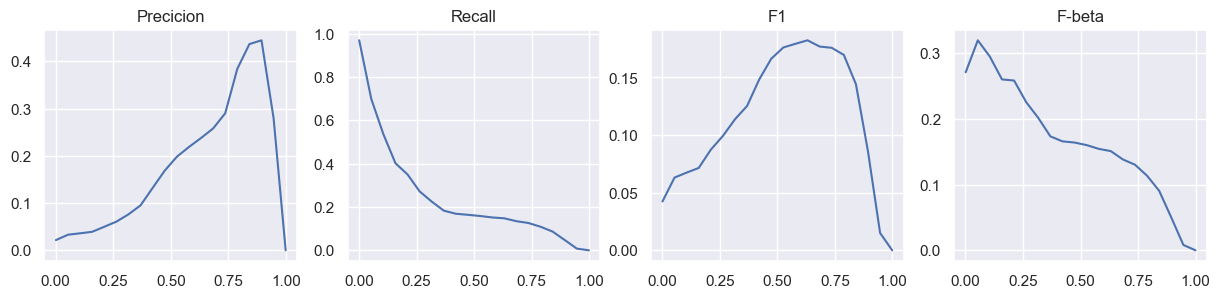

In [81]:
X_train_1, X_test_1, y_train_1, y_test_1 = get_prepared_train_test(
    train_data_raw,
    test_data_raw,
)

column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(X_train_1.columns) - set(["addrId", "class"]))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('rf', RandomForestClassifier(n_estimators=150, class_weight={0: 1, 1: 30}, min_samples_leaf=10))
])
# RandomForestClassifier(min_samples_leaf=
model = pipeline.fit(X_train_1, y_train_1)
y_pred = model.predict_proba(X_test_1)[:, 1]
y_pred_vals = model.predict(X_test_1)

res = get_best_threshold(y_pred, y_test_1, return_hists=True)

In [82]:
print_confusion_matrix(y_pred, 0.7, y_test_1)

	real 1	real 0
pred 1	360	978	
pred 0	2361	181328	


In [84]:
y_pred_10 = ((y_pred >= 0.7) == 1 ) * (y_test_1 == 0)
y_pred_10[y_pred_10 == True][:20]

15      True
23      True
27      True
38      True
40      True
244     True
1653    True
1654    True
1655    True
1665    True
1672    True
1673    True
1675    True
1676    True
1677    True
1679    True
1684    True
1689    True
1691    True
1699    True
Name: class, dtype: bool

In [72]:
rf_model = pipeline.named_steps['rf']
for ind in np.argsort(rf_model.feature_importances_)[::-1]:
    print((X_train.columns)[ind], rf_model.feature_importances_[ind])

btc_received_min 0.10150431831562536
incoming_tx_fees_min 0.08777131729567533
btc_sent_mean 0.08767854666041962
input_address_cnt 0.07550818901962178
output_address_cnt 0.07400062936946719
outcoming_tx_fees_min 0.07030652357073063
outcoming_tx_fees_max 0.05864247882120731
incoming_tx_fees_mean 0.052146930434679925
incoming_tx_ts_gini 0.05049473280191739
outcoming_tx_fees_mean 0.050265886862362275
outcoming_tx_ts_cnt 0.03594732145841427
incoming_tx_cnt 0.032623640750708144
incoming_tx_whole_fee_4_cnt 0.031401972550514703
outcoming_tx_input_address_cnt_mean 0.027658331123564257
outcoming_tx_output_address_cnt_mean 0.02701449987349655
incoming_tx_input_address_cnt_mean 0.025934118814809747
btc_received_mean 0.013247270284269618
btc_sent_gini 0.012763321904657171
first_block_appeared_in 0.01226446891332577
btc_sent_total 0.01102021661792735
btc_received_gini 0.01052949738363028
incoming_tx_fees_max 0.010366305558556369
outcoming_tx_whole_fee_4_cnt 0.008486322701880687
outcoming_tx_cnt 0.00

In [85]:
y_pred[23], y_test_1[23], X_test_1.iloc[23]

(0.8008975699483094,
 0,
 btc_received_total                      0.000000
 btc_received_min                        0.000000
 btc_received_max                        0.000000
 btc_received_mean                       0.000000
 incoming_tx_cnt                         0.000000
 incoming_tx_input_address_cnt_mean      0.000000
 incoming_tx_output_address_cnt_mean     0.000000
 btc_received_gini                       0.000000
 input_address_cnt                       0.000000
 incoming_tx_fees_mean                   0.000000
 incoming_tx_fees_min                    0.000000
 incoming_tx_fees_max                    0.000000
 incoming_tx_whole_fee_4_cnt             0.000000
 btc_sent_total                          0.142022
 btc_sent_min                            0.142022
 btc_sent_max                            0.142022
 btc_sent_mean                           0.142022
 outcoming_tx_cnt                        1.000000
 outcoming_tx_output_address_cnt_mean    1.000000
 outcoming_tx_input_addre

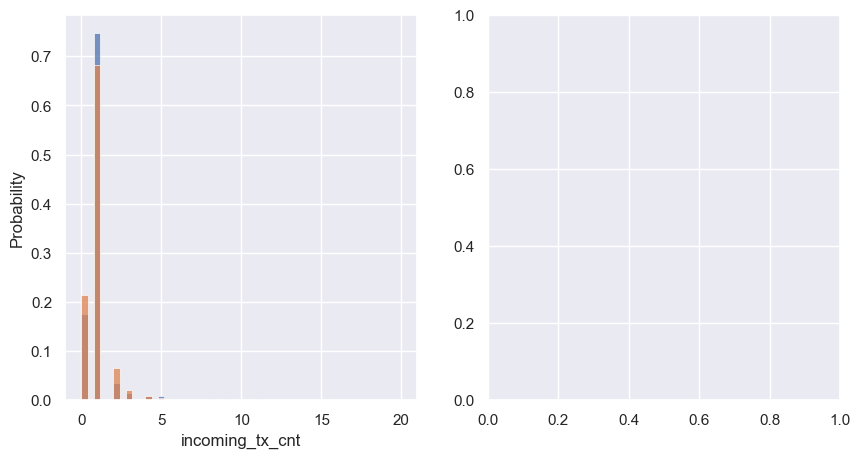

In [ ]:
X_test_1[y_test_1 == 1]["incoming_tx_cnt"].value_counts()


incoming_tx_cnt
1.0      127140
0.0       44795
2.0        8746
3.0         834
4.0         322
          ...  
59.0          1
188.0         1
20.0          1
43.0          1
42.0          1
Name: count, Length: 70, dtype: int64


        Best threshold: 0.4737368421052632
        Best F1: 0.10132974246759804, precicion: 0.08111021288062517, recall: 0.1349775784753363
        


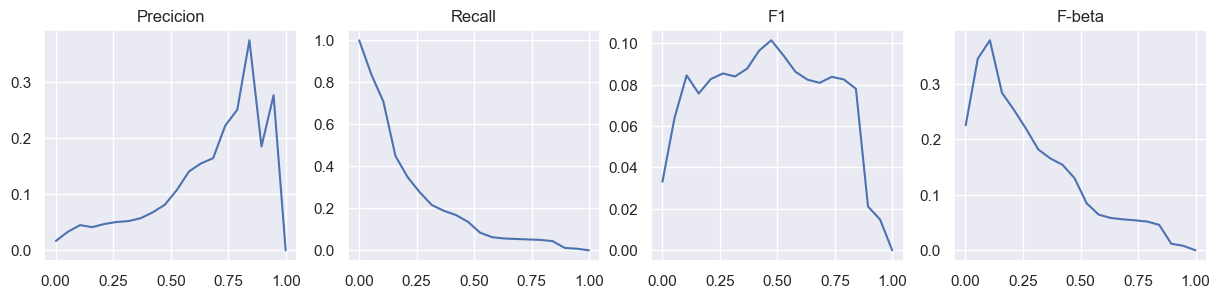

In [21]:
y_pred = model.predict_proba(X_test_1_unique)[:, 1]
y_pred_vals = model.predict(X_test_1_unique)

res = get_best_threshold(y_pred, y_test_1_unique, return_hists=True)

In [16]:
y_test_1_unique.shape

(270566,)

## Выводы из class weight

Появилась возможность повысить recall > 90%, но с огромным уменьшением precicion

Лучший результат с высоким precicion был в стекинге RF + XGBoost c 70% precicion и 90% recall